In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Setup and Data Collection

### Environment Setup:

Load the following tools into your Python environment: OpenCV, Tesseract OCR, NumPy, and Pandas.
Ensure that each library is fully operational and ready for the mission's tasks ahead.

### Load Data:

You can use the images dataset provided in car_images folder, which contains images with clear views of license plates.
Ensure that this data is correctly loaded and accessible within your environment.

In [3]:
#Environment Setup

# Load libraries
# dependencies
# NumPy versions below 1.17 may be incompatible with some other
# packages, so you may need to replace your current version with
# an earlier one in order to run this notebook as-is.
# !pip uninstall numpy --yes
# !pip install "numpy<1.17"
#pip install ipython
#pip install matplotlib
#pip install opencv-python
#pip install argparse


from IPython.display import Image
from matplotlib import pyplot as plt

import cv2
import argparse
import sys
import numpy as np
import pandas as pd
import os.path
!pip install keras
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
# from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install inference_sdk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.13
    Uninstalling aiohttp-3.11.13:
      Successfully uninstalled aiohttp-3.11.13


**Detect Number plate helper function**

In [6]:
from inference_sdk import InferenceHTTPClient
import cv2
import os
import numpy as np
import requests
from google.colab.patches import cv2_imshow


# Initialize the inference client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="oYwu4ZKb1eucB4zLmTl0"
)

def detect_Np(image_path):
    # Load the image locally
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to read the image.")
        return

    # Convert image to URL if required by API
    # Assuming a direct URL-based inference setup

    # Run inference with the InferenceHTTPClient
    image_url = image_path
    result = CLIENT.infer(image_url, model_id="license-plate-detection-ozsne/1")

    license_plate_coords = []

    # Process API results (assuming results include bounding box data)
    if 'predictions' in result:
        for prediction in result['predictions']:
            x1, y1 = int(prediction['x']), int(prediction['y'])
            width, height = int(prediction['width']), int(prediction['height'])
            conf = prediction['confidence']

            # Calculate box coordinates
            x1, y1 = x1 - width // 2, y1 - height // 2
            x2, y2 = x1 + width, y1 + height
            license_plate_coords.append((x1, y1, x2, y2))

            # Draw bounding box and label on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"License Plate {conf:.2f}"
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image, license_plate_coords
    # Display the result
    # cv2_imshow(image)

    # Save the result to disk (optional)
    # output_folder = "/content/drive/MyDrive/Computer_vision/A2/detected_images"
    # os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
    # output_path = os.path.join(output_folder, f"detected_{os.path.basename(image_path)}")

    # Save the detected image
    # if not cv2.imwrite(output_path, image):
    #     print(f"Failed to write the image to {output_path}")
    # else:
    #     print(f"Processed image saved successfully to {output_path}")
    # Wait for a key press to close the window
    # crop_images(image, license_plate_coords, image_path)

    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


# # Path to your image file
# image_dir = '/content/drive/MyDrive/Computer_vision/A2'

# # Process each image in the directory
# for filename in os.listdir(image_dir):
#     if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filter for image files
#         image_path = os.path.join(image_dir, filename)
#         print(f"Processing {image_path}...")
#         detect_Np(image_path)


**Crop images helper function**

In [7]:
def crop_images(image, coords):
    # Create output folder for cropped images
    # cropped_folder = "/content/drive/MyDrive/Computer_vision/A2/cropped_images"
    # os.makedirs(cropped_folder, exist_ok=True)  # Create the folder if it doesn't exist

    for i, (x1, y1, x2, y2) in enumerate(coords):
        # Crop the image using the bounding box coordinates
        cropped_image = image[y1:y2, x1:x2]
        return cropped_image
        # Define the output path for the cropped image
        # cropped_output_path = os.path.join(cropped_folder, f"cropped_{i+1}_{os.path.basename(original_image_path)}")

        # Save the cropped image
        # cv2_imshow(cropped_image)
        # if not cv2.imwrite(cropped_output_path, cropped_image):
        #     print(f"Failed to write the cropped image to {cropped_output_path}")
        # else:
        #     print(f"Cropped image saved successfully to {cropped_output_path}")

# Path to your image file
image_dir = '/content/drive/MyDrive/Computer_vision/A2'

# Process each image in the directory
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filter for image files
        image_path = os.path.join(image_dir, filename)
        print(f"Processing {image_path}...")

        # Detect number plates and get the detected image and coordinates
        detected_image, license_plate_coords = detect_Np(image_path)

        # Crop the images if any plates were detected
        if license_plate_coords:
            crop_images(detected_image, license_plate_coords)

Processing /content/drive/MyDrive/Computer_vision/A2/suzuki-mehran-vx-euro-ii-2015-96143875.jpg...
Processing /content/drive/MyDrive/Computer_vision/A2/2024-01-30_18-54.png...
Processing /content/drive/MyDrive/Computer_vision/A2/toyota-vitz-2007-96143950.jpg...
Processing /content/drive/MyDrive/Computer_vision/A2/tn_toyota-fortuner-2-8-sigma-2022-96143593.jpg...
Processing /content/drive/MyDrive/Computer_vision/A2/2024-01-30_18-08.png...
Processing /content/drive/MyDrive/Computer_vision/A2/2024-01-30_17-41.png...
Processing /content/drive/MyDrive/Computer_vision/A2/toyota-vitz-2007-96143941.jpg...
Processing /content/drive/MyDrive/Computer_vision/A2/suzuki-margalla-gl-5-1996-94729147.jpg...
Processing /content/drive/MyDrive/Computer_vision/A2/toyota-corolla-altis-1-8-grande-automatic-2016-96143788.jpg...


In [8]:
!pip3 install pytesseract


In [9]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.3 MB/s eta 0:00:00


**Find contours helper function**

In [10]:
# from inference_sdk import InferenceHTTPClient
import cv2
import os
import numpy as np
import requests
from google.colab.patches import cv2_imshow
import statistics as st

# helper function for countors identification
def find_contours(dimensions, img):
    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]

    # Check largest 5 or 15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

    ii = cv2.imread('contour.jpg')

    x_cntr_list = []
    img_res = []
    widths = []
    heights = []
    contours = []  # Store contour coordinates here

    # Calculate the middle line of the license plate
    middle_line = img.shape[0] // 2

    # Sort contours based on x-coordinate and then on y-coordinate
    sorted_cntrs = sorted(cntrs, key=lambda c: (c[0][0][0], c[0][0][1]))

    # Separate contours above and below the middle line
    above_middle = []
    below_middle = []
    for cntr in sorted_cntrs:
        x, y, w, h = cv2.boundingRect(cntr)

        if y < middle_line:
            above_middle.append((x, y, w, h, cntr))
        else:
            below_middle.append((x, y, w, h, cntr))

    # Sort contours from left to right
    above_middle = sorted(above_middle, key=lambda c: c[0])
    below_middle = sorted(below_middle, key=lambda c: c[0])

    # Process contours above the middle line
    for x, y, w, h, cntr in above_middle:
        if w > lower_width and w < upper_width and h > lower_height and h < upper_height:
            char = img[y:y+h, x:x+w]
            white_pixels = np.sum(char == 255)
            total_pixels = char.size
            white_percentage = (white_pixels / total_pixels) * 100

            if white_percentage >= 25:
                x_cntr_list.append((x, y))  # stores the (x, y) coordinates of the character's contour
                widths.append(w)
                heights.append(h)
                contours.append((x, y, x+w, y+h))  # Append contour coordinates

                char_copy = np.zeros((44, 24))
                # Extracting each character using the enclosing rectangle's coordinates.
                char = cv2.resize(char, (20, 40))

                cv2.rectangle(ii, (x, y), (x+w, y+h), (50, 21, 200), 2)
                plt.imshow(ii, cmap='gray')

                # Make result formatted for classification: invert colors
                char = cv2.subtract(255, char)

                # Resize the image to 24x44 with a black border
                char_copy[2:42, 2:22] = char
                char_copy[0:2, :] = 0
                char_copy[:, 0:2] = 0
                char_copy[42:44, :] = 0
                char_copy[:, 22:24] = 0

                img_res.append(char_copy)  # List that stores the character's binary image (unsorted)

    # Process contours below the middle line
    for x, y, w, h, cntr in below_middle:
        if w > lower_width and w < upper_width and h > lower_height and h < upper_height:
            char = img[y:y+h, x:x+w]
            white_pixels = np.sum(char == 255)
            total_pixels = char.size
            white_percentage = (white_pixels / total_pixels) * 100

            if white_percentage >= 25:
                x_cntr_list.append((x, y))  # stores the (x, y) coordinates of the character's contour
                widths.append(w)
                heights.append(h)
                contours.append((x, y, x+w, y+h))  # Append contour coordinates

                char_copy = np.zeros((44, 24))
                # Extracting each character using the enclosing rectangle's coordinates.
                char = cv2.resize(char, (20, 40))

                cv2.rectangle(ii, (x, y), (x+w, y+h), (50, 21, 200), 2)
                plt.imshow(ii, cmap='gray')

                # Make result formatted for classification: invert colors
                char = cv2.subtract(255, char)

                # Resize the image to 24x44 with a black border
                char_copy[2:42, 2:22] = char
                char_copy[0:2, :] = 0
                char_copy[:, 0:2] = 0
                char_copy[42:44, :] = 0
                char_copy[:, 22:24] = 0

                img_res.append(char_copy)  # List that stores the character's binary image (unsorted)

    # Calculate median width and height
    median_width = st.median(widths)
    median_height = st.median(heights)

    # Filter characters based on width and height deviation from the median
    filtered_img_res = []
    filtered_contours = []
    for char, contour in zip(img_res, contours):
        x1, y1, x2, y2 = contour
        if ((x2 - x1) >= 0.70 * median_width) and ((x2 - x1) <= 1.3 * median_width) and ((y2 - y1) >= 0.70 * median_height) and ((y2 - y1) <= 1.3 * median_height):
            filtered_img_res.append(char)
            filtered_contours.append(contour)

    # Remove contours with a distance of more than 15 pixels between them
    remaining_contours = []
    remaining_filtered_img_res = []
    if len(filtered_contours) > 1:
        center_x = img.shape[1] / 3
        distance = 0
        count = 1
        for i in range(1, len(filtered_contours)):
            if count >= len(filtered_contours):
                break
            x1_prev, _, x2_prev, _ = filtered_contours[count - 1]
            x1_curr, _, x2_curr, _ = filtered_contours[count]
            distance = x1_curr - x2_prev
            print (f"Distance between contours {count} and {count+1}: {distance}")
            if distance <= -175:
                count += 1
                continue
            elif distance <= 15:
                print("if (distance <= 15):")
                remaining_contours.append(filtered_contours[count - 1])
                remaining_filtered_img_res.append(filtered_img_res[count - 1])
                count += 1
            elif x1_curr < center_x:
                print("elif x1_curr < center_x:")
                remaining_contours.append(filtered_contours[count])
                remaining_filtered_img_res.append(filtered_img_res[count])
                count +=2
            elif x1_curr >= (center_x * 2):
                print("elif x1_curr >= center_x:")
                remaining_contours.append(filtered_contours[count - 1])
                remaining_filtered_img_res.append(filtered_img_res[count - 1])
                count +=2
            else:
                print("else:")
                remaining_contours.append(filtered_contours[count - 1])
                remaining_filtered_img_res.append(filtered_img_res[count - 1])
                count += 1

        print("Last contour")
        remaining_contours.append(filtered_contours[-1])
        remaining_filtered_img_res.append(filtered_img_res[-1])

    plt.show()

    return np.array(remaining_filtered_img_res)


**Segment chars helper function**

In [11]:


# Get the height and width of the loaded image
# Find characters in the resulting images
def segment_characters(image):
    LP_HEIGHT, LP_WIDTH = image.shape[:2]


    # Preprocess cropped license plate image
    resized_image = cv2.resize(image, (LP_WIDTH, LP_HEIGHT))

    # resize image
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # code here

    # grey scale conversion
    _, binary_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # code here

    # apply a threshold to binarize the grey scale image
    # code here

    # aply some morphological operators
    kernel = np.ones((3, 3), np.uint8)
    morphed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)
    # plt.show()
    # code here



    # Make borders white
    cv2.copyMakeBorder(morphed_img, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=[255, 255, 255])
    plt.show()

    # code here


    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/10,
                  2*LP_WIDTH/2.5,
                  LP_HEIGHT/20,
                  2*LP_HEIGHT/2.5]

    # plt.show()
    cv2.imwrite('contour.jpg', binary_img)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, binary_img)

    return char_list

**Segment chars helper function testing**

Distance between contours 1 and 2: 0
if (distance <= 15):
Distance between contours 2 and 3: -36
if (distance <= 15):
Distance between contours 3 and 4: 0
if (distance <= 15):
Distance between contours 4 and 5: 0
if (distance <= 15):
Distance between contours 5 and 6: 0
if (distance <= 15):
Last contour


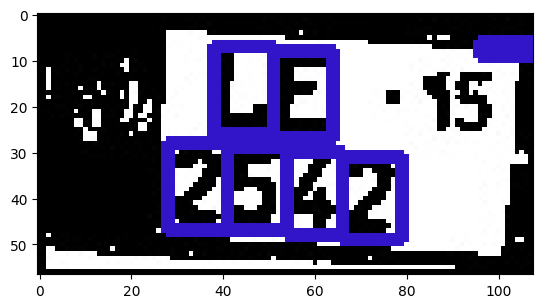

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [12]:
from IPython.display import Image
from matplotlib import pyplot as plt

import cv2
import argparse
import sys
import numpy as np
import pandas as pd
#Test the function
# Reading cropped license plate image
image_path = '/content/drive/MyDrive/Computer_vision/A2/cropped_images/cropped_1_suzuki-mehran-vx-euro-ii-2015-96143875.jpg'
# image_path = '/content/drive/MyDrive/Computer_vision/A2/cropped_images/cropped_1_toyota-corolla-altis-1-8-grande-automatic-2016-96143788.jpg'
image = cv2.imread(image_path)
# LP_HEIGHT, LP_WIDTH = image.shape[:2]
# print(LP_HEIGHT,LP_WIDTH)

char = segment_characters(image)
char

**CNNet Class**

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)  # Increased filters to 64
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Increased filters to 128
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)  # Added another convolutional layer with 256 filters
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)  # Added another convolutional layer with 512 filters

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 2 * 2, 1024)  # Increased units to 1024
        self.fc2 = nn.Linear(1024, 512)  # Increased units to 512
        self.fc3 = nn.Linear(512, 36)  # 36 classes

        self.dropout = nn.Dropout(0.5)  # Increased dropout to 0.5

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 512 * 2 * 2)  # Flattening
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x


In [23]:
import torch
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNNet().to(device)
# Initialize the model
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
 # Ensure to define your model class again

# Load the model's state dictionary
# model = CNNNet().to(device)  # Ensure the model is on the correct device
model.load_state_dict(torch.load("/content/drive/MyDrive/Computer_vision/A2/cnn_model.pth"), strict=False)
model.eval()  # Set the model to evaluation mode
# Set the model to evaluation mode (if you're going to evaluate it)



CNNNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=36, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

**Helper function for OCR**

In [24]:
import numpy as np
import cv2
import torch

# Preprocess input image for character prediction
def fix_dimension(img):
    # Ensure the image is in the correct format (28, 28, 1) for grayscale
    # img_resized = cv2.resize(img, (28, 28))
    img_resized = cv2.resize(img, (32, 32))


    if len(img_resized.shape) == 3:
      img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    img_normalized = img_resized.astype(np.float32) / 255.0  # Normalize to [0, 1]
    img_tensor = torch.tensor(img_normalized).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
    return img_tensor.to(device)

def show_results(characters, char_images):
    dic = {i: c for i, c in enumerate(characters)}


    output = []
    for char_img in char_images:  # Iterating over the characters
        # resize image
        img_tensor = fix_dimension(char_img)

        # Preparing image for the model (N, C, H, W)

        # Convert to PyTorch tensor and normalize

        # Normalize to [0, 1]

        # Make prediction
        # No gradient tracking for inference
        # Forward pass
        # Get predicted class
        with torch.no_grad():  # No gradient tracking for inference
            model.eval()  # Set the model to evaluation mode
            pred = model(img_tensor)  # Forward pass
            predicted_class = torch.argmax(pred, dim=1).item()  # Get predicted class index


        # Storing the result in a list
        output.append(dic[predicted_class])
    plate_number = ''.join(output)
    print(plate_number)

    return plate_number

# Example characters to predict
characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# Assume `char` is a list of character images (each image is a numpy array)
lp_number = show_results(characters, char)
print(lp_number)


LE2H42
LE2H42


# License plate detection and OCR recognition with Logging

With the license plates successfully recognized, it’s time to finalize the operation by logging the critical information.

**Tasks:**

### Extract Timestamps:
**Objective:**
Identify and log the specific time and image label.

**Tasks:**
Develop a method to extract the image label and the timestamp corresponding to each detected license plate (time when entry was created in the database).
Ensure this information is accurately logged and associated with the correct license plate number for easy retrieval and reporting.



In [21]:
import os
import cv2
import pandas as pd
from datetime import datetime

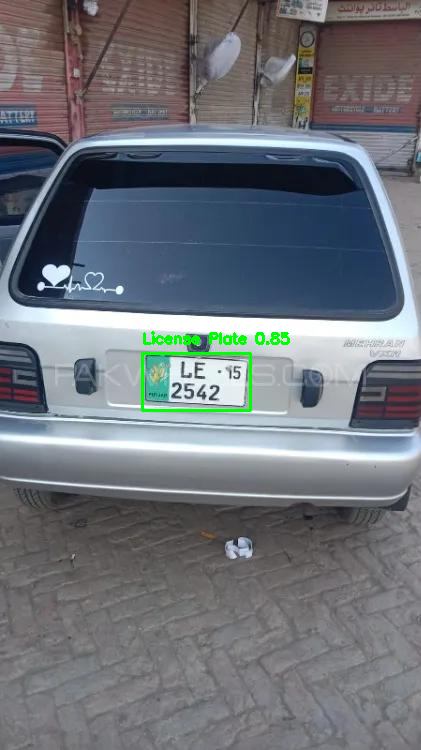

[(142, 353, 250, 410)]


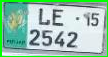

Distance between contours 1 and 2: 0
if (distance <= 15):
Distance between contours 2 and 3: -36
if (distance <= 15):
Distance between contours 3 and 4: 0
if (distance <= 15):
Distance between contours 4 and 5: 0
if (distance <= 15):
Distance between contours 5 and 6: 0
if (distance <= 15):
Last contour


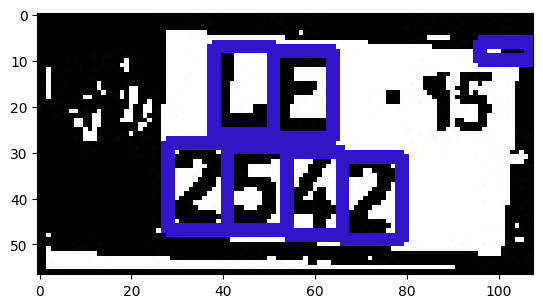

LE2H42


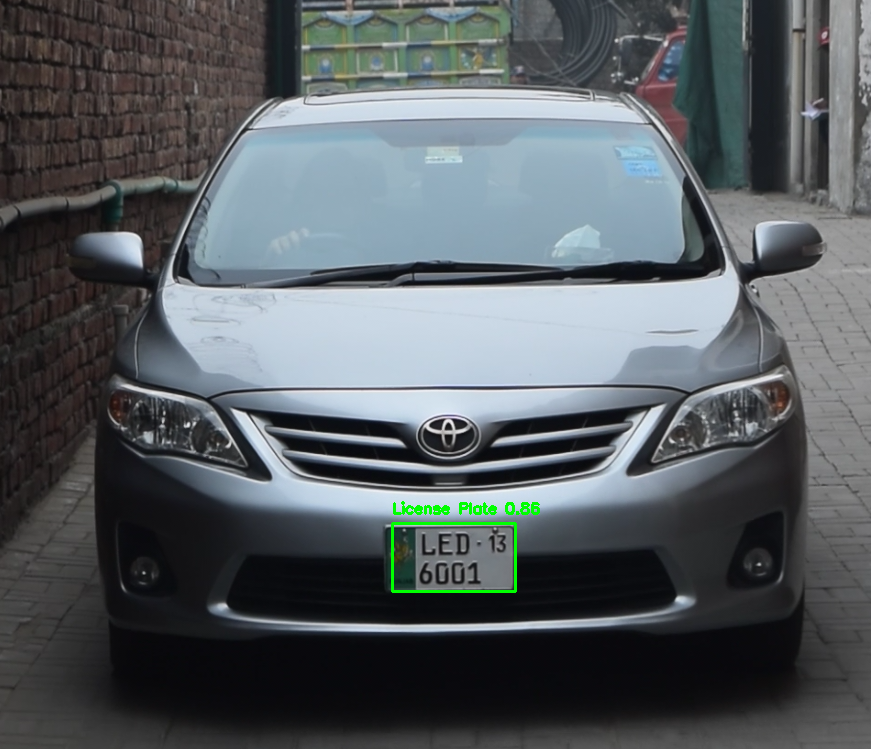

[(392, 523, 515, 591)]


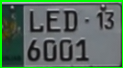

Distance between contours 1 and 2: 0
if (distance <= 15):
Distance between contours 2 and 3: 1
if (distance <= 15):
Distance between contours 3 and 4: -53
if (distance <= 15):
Distance between contours 4 and 5: 1
if (distance <= 15):
Distance between contours 5 and 6: 1
if (distance <= 15):
Distance between contours 6 and 7: 1
if (distance <= 15):
Last contour


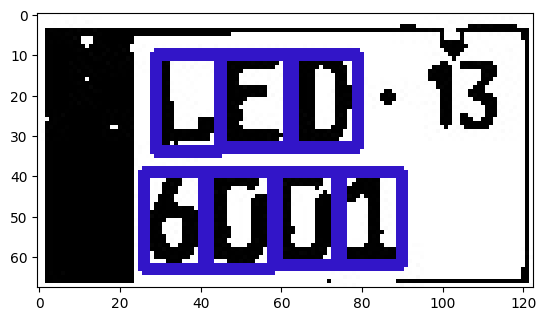

LEDHDD1


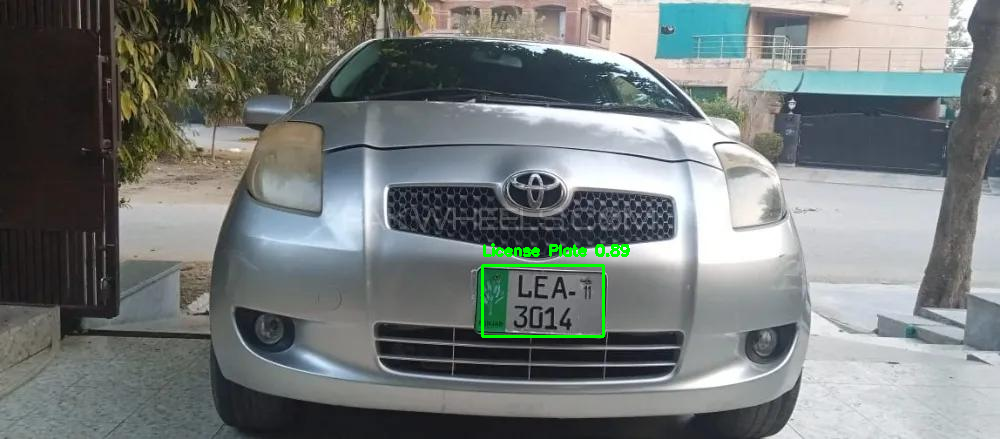

[(482, 265, 603, 336)]


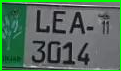

Distance between contours 1 and 2: 0
if (distance <= 15):
Distance between contours 2 and 3: 1
if (distance <= 15):
Distance between contours 3 and 4: -55
if (distance <= 15):
Distance between contours 4 and 5: 0
if (distance <= 15):
Distance between contours 5 and 6: -1
if (distance <= 15):
Distance between contours 6 and 7: 0
if (distance <= 15):
Last contour


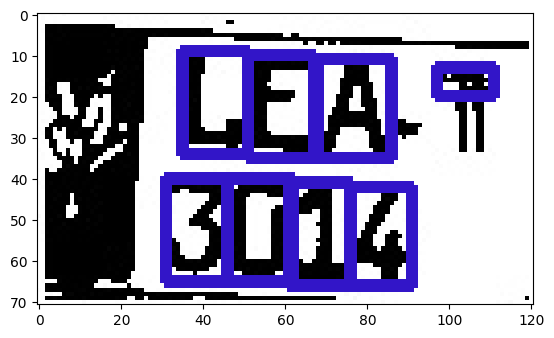

LEAJU14


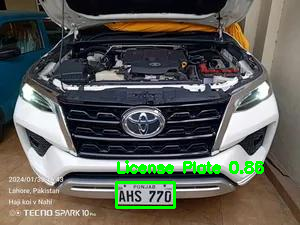

[(116, 182, 174, 207)]


Distance between contours 1 and 2: 0
if (distance <= 15):
Distance between contours 2 and 3: 0
if (distance <= 15):
Distance between contours 3 and 4: 6
if (distance <= 15):
Distance between contours 4 and 5: -1
if (distance <= 15):
Distance between contours 5 and 6: 0
if (distance <= 15):
Last contour


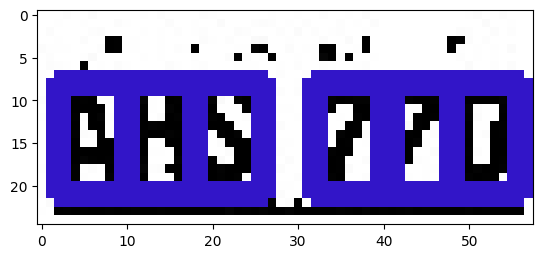

AHHHHH


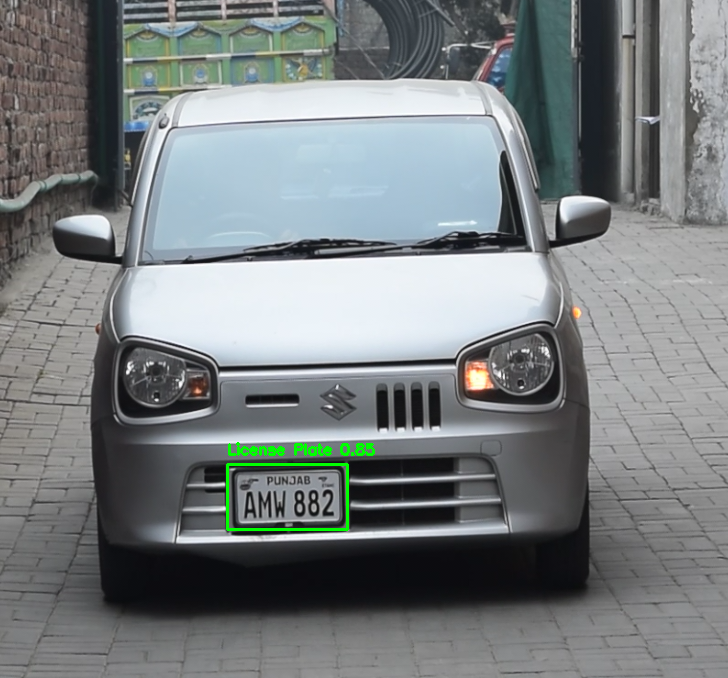

[(227, 464, 347, 529)]


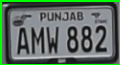

Distance between contours 1 and 2: 0
if (distance <= 15):
Distance between contours 2 and 3: 0
if (distance <= 15):
Distance between contours 3 and 4: 7
if (distance <= 15):
Distance between contours 4 and 5: 1
if (distance <= 15):
Distance between contours 5 and 6: 2
if (distance <= 15):
Last contour


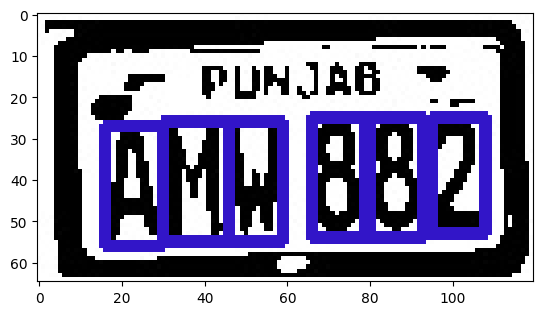

AMM8H2


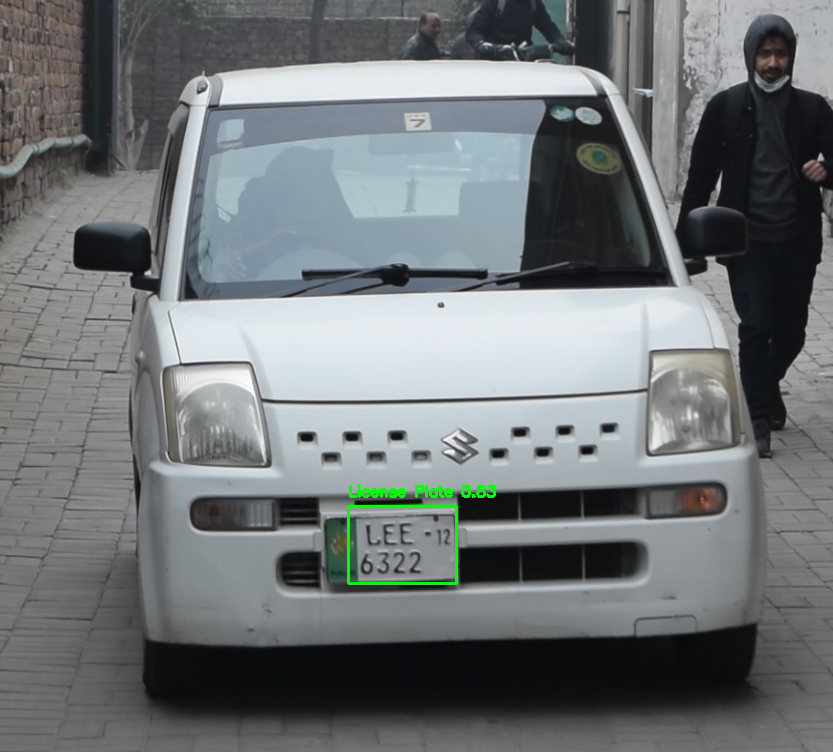

[(348, 506, 456, 583)]


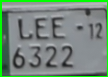

Distance between contours 1 and 2: 0
if (distance <= 15):
Distance between contours 2 and 3: 0
if (distance <= 15):
Distance between contours 3 and 4: -55
if (distance <= 15):
Distance between contours 4 and 5: 2
if (distance <= 15):
Distance between contours 5 and 6: 2
if (distance <= 15):
Distance between contours 6 and 7: 2
if (distance <= 15):
Last contour


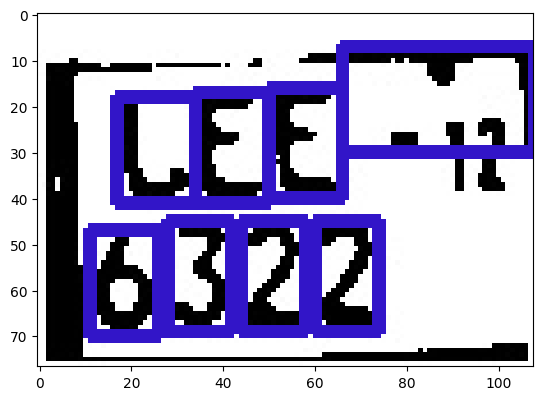

LEE6322


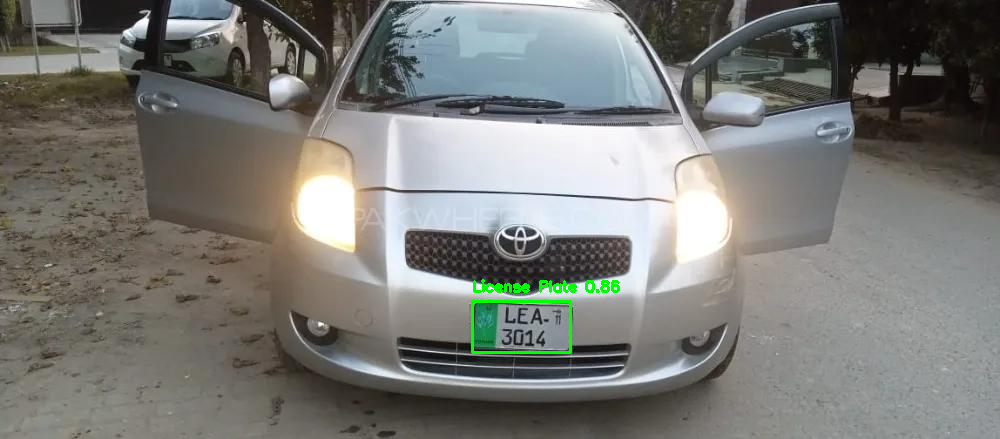

[(472, 301, 570, 352)]


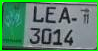

Distance between contours 1 and 2: -1
if (distance <= 15):
Distance between contours 2 and 3: 0
if (distance <= 15):
Distance between contours 3 and 4: -43
if (distance <= 15):
Distance between contours 4 and 5: -1
if (distance <= 15):
Distance between contours 5 and 6: -1
if (distance <= 15):
Distance between contours 6 and 7: 0
if (distance <= 15):
Last contour


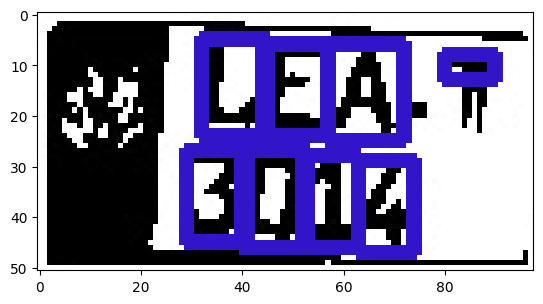

HE4JH14


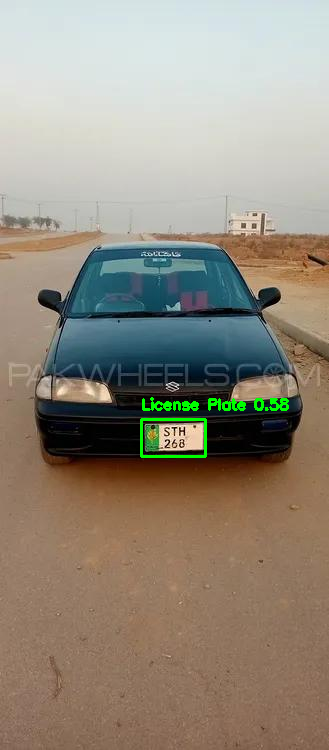

[(141, 419, 205, 456)]


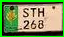

Distance between contours 1 and 2: 0
if (distance <= 15):
Distance between contours 2 and 3: 0
if (distance <= 15):
Distance between contours 3 and 4: -22
if (distance <= 15):
Distance between contours 4 and 5: 7
if (distance <= 15):
Last contour


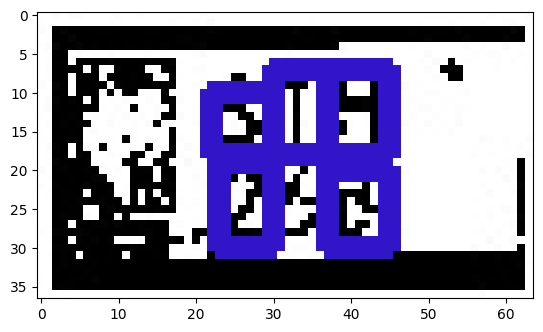

HHHHH


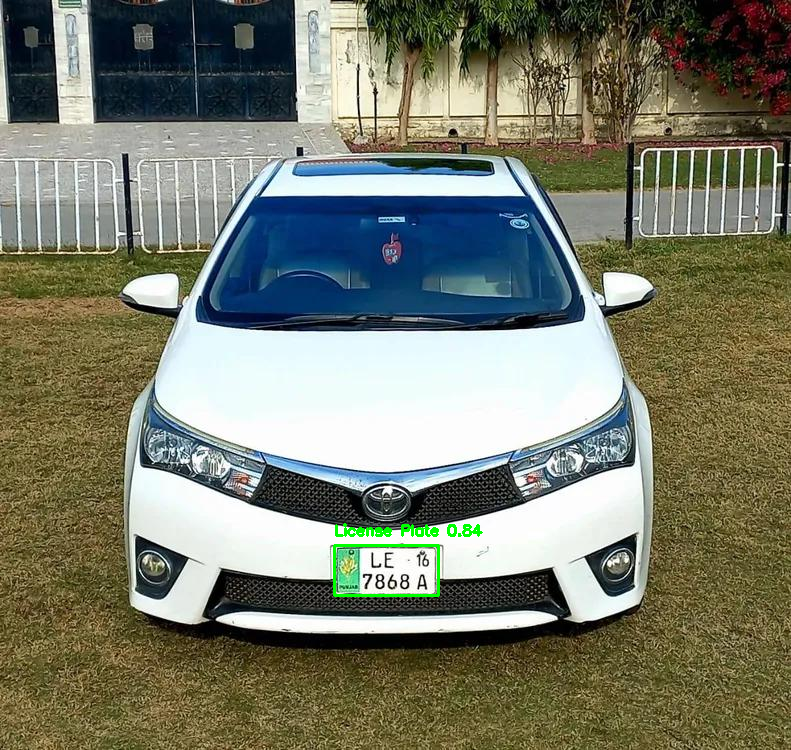

[(334, 545, 438, 595)]


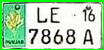

Distance between contours 1 and 2: 1
if (distance <= 15):
Distance between contours 2 and 3: -33
if (distance <= 15):
Distance between contours 3 and 4: 1
if (distance <= 15):
Distance between contours 4 and 5: 0
if (distance <= 15):
Distance between contours 5 and 6: 1
if (distance <= 15):
Distance between contours 6 and 7: 6
if (distance <= 15):
Last contour


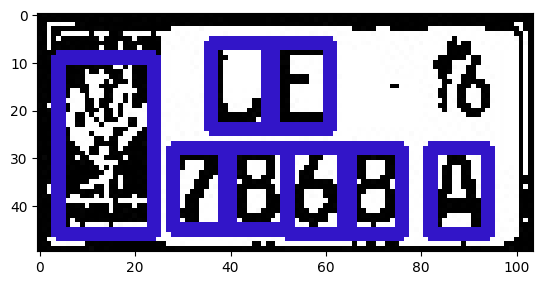

LEH86HA
Log saved to /content/license_plate_log.csv


In [25]:
import os
import cv2
import pandas as pd
import numpy as np
from datetime import datetime

# Assuming these are defined somewhere in your code




# Path to the images directory
images_dir = '/content/drive/MyDrive/Computer_vision/A2'
# Initialize a list to store detected license plates and corresponding labels
detected_data = []

# Iterate over all images in the directory
for image_name in os.listdir(images_dir):
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filter for image files
        image_path = os.path.join(images_dir, image_name)

        # Detect number plates and get the detected image and coordinates
        detected_image, license_plate_coords = detect_Np(image_path)
        cv2_imshow(detected_image)
        print(license_plate_coords)
        # Crop the images if any plates were detected
        if license_plate_coords:
            cropped_plate_image = crop_images(detected_image, license_plate_coords)
            cv2_imshow(cropped_plate_image)
            # Segment characters from the cropped license plate image
            char_images = segment_characters(cropped_plate_image)

            # Recognize the license plate number using segmented characters
            recognized_number = show_results(characters, char_images)

            # Get current timestamp
            timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

            # Append to detected data
            detected_data.append({
                    'license_plate': recognized_number,
                    'image_label': image_name,
                    'timestamp': timestamp
                })

# Create a DataFrame and save to CSV
df = pd.DataFrame(detected_data)
csv_path = '/content/license_plate_log.csv'
df.to_csv(csv_path, index=False)
print(f"Log saved to {csv_path}")


#Streamlit Integration and Safe City Deployment: 15 Marks

Agent, your final task is to integrate all your hard work into a user-friendly application that can be deployed in the real world. With Safe City cameras employed everywhere, your Streamlit application will play a crucial role in maintaining security across the city. This mission will require you to develop a streamlined web application that automatically recognizes license plates from uploaded images and logs the data for easy access and analysis.

**Tasks:**

### Streamlit Web Application Development:

Create a simple, yet effective, web application using Streamlit that integrates your previous work into a cohesive system.

Develop a Streamlit application allowing users to enter car license numbers and generate car images with corresponding timestamps.



In [ ]:
!pip install streamlit pyngrok


In [ ]:
!npm install -g localtunnel


In [ ]:
!jupyter nbconvert --to script PA_2_Part2.ipynb


In [ ]:
with open('app.py', 'w') as f:
    f.write("""
import streamlit as stil
import cv2
import numpy as np
import pandas as pd
from datetime import datetime

# Placeholder for detected data logging
detected_data = []

def main():
    stil.title("License Plate Recognition System")
    stil.write("Upload an image to recognize license plates and log the data.")

    # Image uploader widget
    uploaded_file = stil.file_uploader("Choose an image...", type=["png", "jpg", "jpeg"])

    if uploaded_file is not None:
        # Convert uploaded file to OpenCV format
        image = cv2.imdecode(np.frombuffer(uploaded_file.read(), np.uint8), cv2.IMREAD_COLOR)
        stil.image(image, channels="BGR", caption="Uploaded Image")

        # Detect license plate in the image
        detected_image, license_plate_coords = detect_Np(image)

        if license_plate_coords:
            # Crop and segment characters if plates were detected
            cropped_plate_image = crop_images(detected_image, license_plate_coords)
            char_images = segment_characters(cropped_plate_image)
            recognized_number = show_results(char_images)

            # Log the timestamp
            timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

            # Save detection data
            detected_data.append({
                'license_plate': recognized_number,
                'timestamp': timestamp
            })

            # Display the data as a DataFrame
            df = pd.DataFrame(detected_data)
            stil.write(df)

            # Save to CSV
            csv_path = '/content/drive/MyDrive/Computer_vision/A2/license_plate_log.csv'
            df.to_csv(csv_path, index=False)
            stil.success(f"Log saved to {csv_path}")

if __name__ == "__main__":
    main()
    """)


In [ ]:
# Start the Streamlit app in the background
!npm install localtunnel
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

# Start localtunnel to create a public URL
